In [1]:
import pandas as pd

# Load the dataset
file_path = "D:\\California_Fire_Incidents.csv"
fire_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
fire_data.head()


,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [2]:
# Data Preprocessing
import numpy as np

# Remove unnecessary columns
columns_to_keep = ['AcresBurned', 'AdminUnit', 'ArchiveYear', 'CalFireIncident', 
                   'Counties', 'Started', 'Status', 'StructuresDestroyed', 'WaterTenders']

# Selecting relevant columns
fire_data_relevant = fire_data[columns_to_keep]

# Convert 'Started' to datetime for easier manipulation
fire_data_relevant['Started'] = pd.to_datetime(fire_data_relevant['Started'], errors='coerce')

# Drop rows with missing values in key columns
fire_data_relevant = fire_data_relevant.dropna(subset=['AcresBurned', 'Started', 'Counties'])

# Fill missing numeric columns with 0 (assuming they weren't reported or not applicable)
fire_data_relevant['StructuresDestroyed'] = fire_data_relevant['StructuresDestroyed'].fillna(0)
fire_data_relevant['WaterTenders'] = fire_data_relevant['WaterTenders'].fillna(0)

# Display the preprocessed dataset's summary
fire_data_relevant.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633 entries, 0 to 1632
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   AcresBurned          1633 non-null   float64            
 1   AdminUnit            1633 non-null   object             
 2   ArchiveYear          1633 non-null   int64              
 3   CalFireIncident      1633 non-null   bool               
 4   Counties             1633 non-null   object             
 5   Started              1633 non-null   datetime64[ns, UTC]
 6   Status               1633 non-null   object             
 7   StructuresDestroyed  1633 non-null   float64            
 8   WaterTenders         1633 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](1), float64(3), int64(1), object(3)
memory usage: 116.4+ KB


C:\Users\USER\AppData\Local\Temp\ipykernel_14436\136030279.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_data_relevant['Started'] = pd.to_datetime(fire_data_relevant['Started'], errors='coerce')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


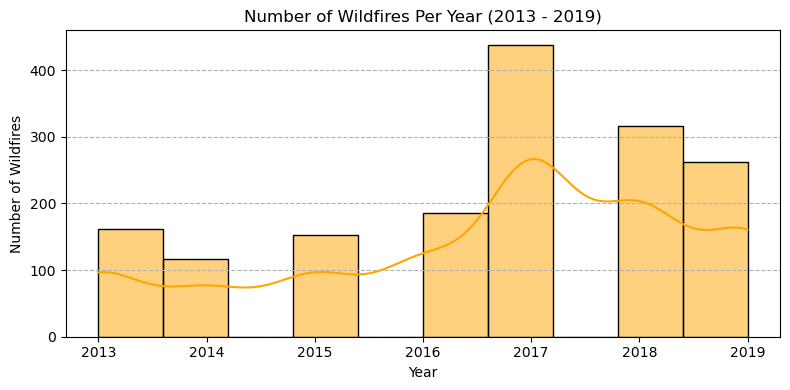

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of wildfires over time
plt.figure(figsize=(8, 4))

# Plotting the number of wildfires per year
sns.histplot(fire_data_relevant['ArchiveYear'], bins=10, kde=True, color='orange')

plt.title("Number of Wildfires Per Year (2013 - 2019)")
plt.xlabel("Year")
plt.ylabel("Number of Wildfires")
plt.xticks(range(2013, 2020))
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()


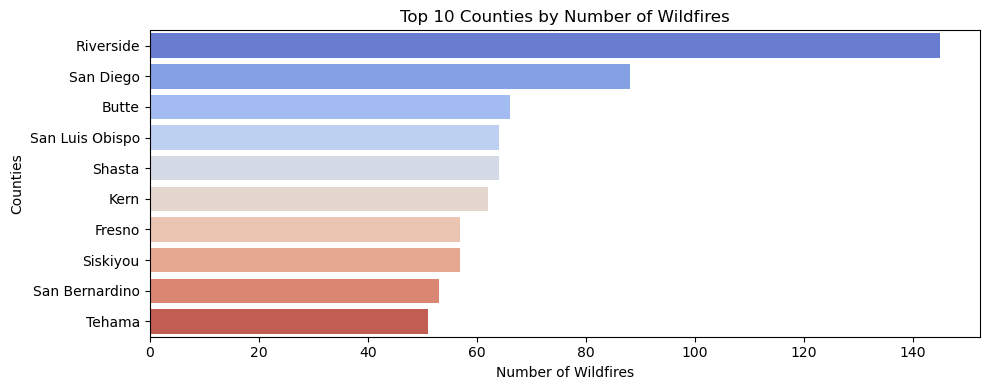

In [4]:
# Distribution of wildfires across counties
plt.figure(figsize=(10, 4))

# Plotting top counties by the number of wildfires
top_counties = fire_data_relevant['Counties'].value_counts().nlargest(10)
sns.barplot(y=top_counties.index, x=top_counties.values, palette='coolwarm')

plt.title("Top 10 Counties by Number of Wildfires")
plt.xlabel("Number of Wildfires")
plt.ylabel("Counties")
plt.tight_layout()

plt.show()


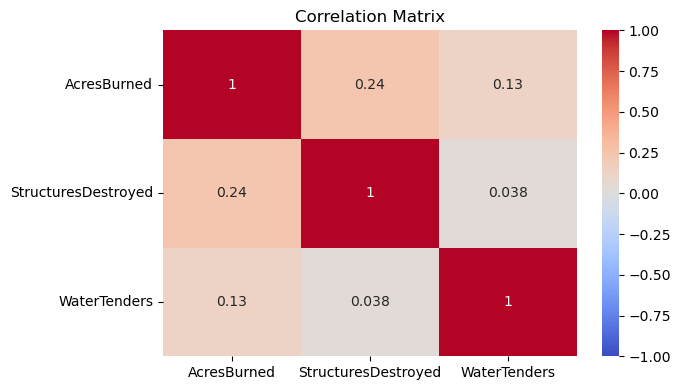

In [5]:
# Correlation analysis
# Extracting relevant numeric columns for correlation
numeric_data = fire_data_relevant[['AcresBurned', 'StructuresDestroyed', 'WaterTenders']]

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Visualization of the correlation matrix
plt.figure(figsize=(7, 4))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title("Correlation Matrix")
plt.tight_layout()

plt.show()


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


# Selecting relevant columns
columns_to_keep = ['AcresBurned', 'AdminUnit', 'ArchiveYear', 'Counties', 
                   'Started', 'StructuresDestroyed', 'WaterTenders']

fire_data_relevant = fire_data[columns_to_keep]
fire_data_relevant['Started'] = pd.to_datetime(fire_data_relevant['Started'], errors='coerce')

fire_data_relevant = fire_data_relevant.dropna(subset=['AcresBurned', 'Started', 'Counties'])
fire_data_relevant['StructuresDestroyed'] = fire_data_relevant['StructuresDestroyed'].fillna(0)
fire_data_relevant['WaterTenders'] = fire_data_relevant['WaterTenders'].fillna(0)

# Feature Engineering
fire_data_relevant['Duration'] = (fire_data_relevant['Started'] - fire_data_relevant['Started'].min()).dt.days
fire_data_relevant['Year'] = fire_data_relevant['Started'].dt.year
fire_data_relevant['Season'] = fire_data_relevant['Started'].dt.month // 3 + 1

# Selecting features for modeling
features = ['AcresBurned', 'Duration', 'WaterTenders', 'Season', 'Year']
X = fire_data_relevant[features]
y = fire_data_relevant['StructuresDestroyed']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf', C=1.0, gamma='scale'),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Model Evaluation Function
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Evaluating and displaying results
for model_name, model in models.items():
    print(f"{model_name}:")
    model.fit(X_train_scaled, y_train)
    mse, r2 = evaluate_model(model, X_test_scaled, y_test)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}\n")


C:\Users\USER\AppData\Local\Temp\ipykernel_14436\1740161453.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_data_relevant['Started'] = pd.to_datetime(fire_data_relevant['Started'], errors='coerce')


Linear Regression:
Mean Squared Error: 105527.58292402774
R-squared: 0.024195156859729505

Random Forest:
Mean Squared Error: 31007.03635749235
R-squared: 0.7132804958600234

SVR:
Mean Squared Error: 108766.59687905683
R-squared: -0.005755737652767268

Decision Tree:
Mean Squared Error: 7926.006116207951
R-squared: 0.9267088760999745

Gradient Boosting:
Mean Squared Error: 4670.256359697708
R-squared: 0.9568145251864569



In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create the Gradient Boosting regressor
gb_regressor = GradientBoostingRegressor()

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions
y_pred = best_estimator.predict(X_test)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest hyperparameters
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Gradient Boosting hyperparameters
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(), param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

# Best parameters for Random Forest
print("Random Forest Best Parameters:", rf_grid_search.best_params_)

# Best parameters for Gradient Boosting
print("Gradient Boosting Best Parameters:", gb_grid_search.best_params_)

# Best estimators
best_rf_model = rf_grid_search.best_estimator_
best_gb_model = gb_grid_search.best_estimator_


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Random Forest Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Gradient Boosting Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


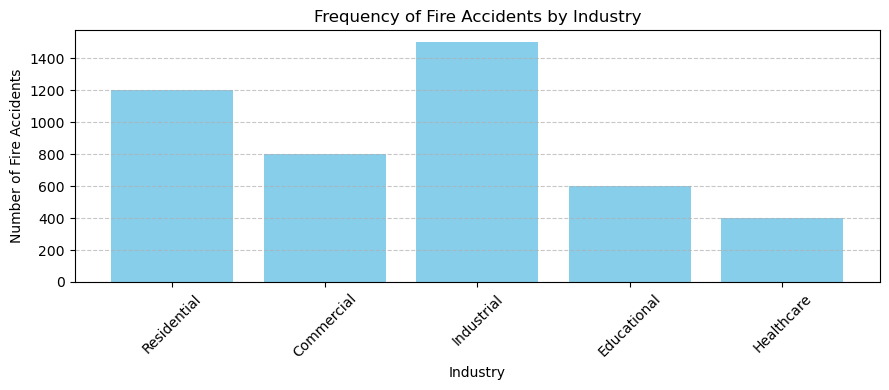

In [13]:
import matplotlib.pyplot as plt

# Sample data for illustration purposes
fields = ['Residential', 'Commercial', 'Industrial', 'Educational', 'Healthcare']
accidents = [1200, 800, 1500, 600, 400]

plt.figure(figsize=(9, 4))
plt.bar(fields, accidents, color='skyblue')
plt.title('Frequency of Fire Accidents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Fire Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


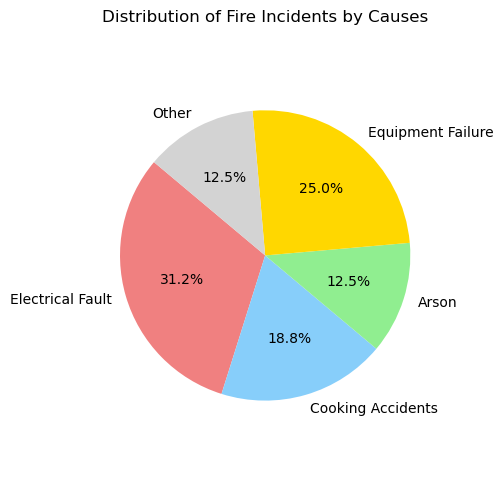

In [14]:
import matplotlib.pyplot as plt

# Sample data for illustration purposes
causes = ['Electrical Fault', 'Cooking Accidents', 'Arson', 'Equipment Failure', 'Other']
incident_counts = [500, 300, 200, 400, 200]

plt.figure(figsize=(5, 5))
plt.pie(incident_counts, labels=causes, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'lightgrey'])
plt.title('Distribution of Fire Incidents by Causes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


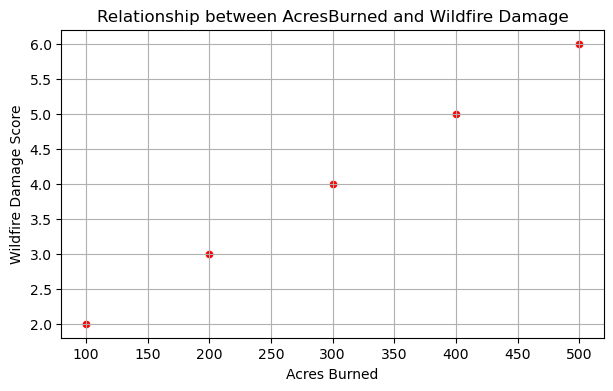

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for illustration purposes
acres_burned = [100, 200, 300, 400, 500]  # Acres burned
damage_score = [2, 3, 4, 5, 6]  # Wildfire damage score

plt.figure(figsize=(7, 4))
sns.scatterplot(x=acres_burned, y=damage_score, color='red')
plt.title('Relationship between AcresBurned and Wildfire Damage')
plt.xlabel('Acres Burned')
plt.ylabel('Wildfire Damage Score')
plt.grid(True)
plt.show()
